In [68]:
import matplotlib.pyplot as plt
import numpy as np
import random
import collections
import numpy.fft as fft
np.seterr(divide='warn', invalid='warn')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [69]:
# Définition des paramètres

alpha = 216 # Taux de transcription
betaMean, betaSigma = 1, 0.1 # mean and standard deviation of Beta
nbrSimu = 10**4 # 
Q = 0.8 # paramètre de synchronisation
kappa = 20 # transcription maximale de LacI avec AI en condition saturante
nHill = 2.0 # Paramètre correspondant à une certaine coopération des mécanismes de répressions
ks0 = 1
ks1 = 0.01
eta = 2.0
t = 500 # temps de la simulation
nCell = 10 # nbr de cellule simulées
tau = 0.5 # pas de temps

beta = [] # paramètre permettant de varier les cellules (ratio mRNA/vie de la protéine)
for i in range(nCell):
    beta.append(random.gauss(1,0.05))
    
frequence_list = []


In [70]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))


Si = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = 0
b[:,0] = 0
c[:,0] = 0

A[:,0] = 0
B[:,0] = 0
C[:,0] = 0


Si[:,0] = 0 # Concentration AI (auto-inducer) intracellulaire
Se[:,0] = 0 # Concentration AI (auto-inducer) extracellulaire

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        # Représentation de la dynamique d'évoultion de l'ARNm
        a[i,j+1] = a[i,j] + tau * (-a[i,j] + (alpha/(1+C[i,j]**nHill)))
        b[i,j+1] = b[i,j] + tau * (-b[i,j] + (alpha/(1+A[i,j]**nHill)))
        c[i,j+1] = c[i,j] + tau * (-c[i,j] + (alpha/(1+B[i,j]**nHill)) + (kappa * Si[i,j] / 1 + Si[i,j]))

        # Représentation de la dynamyque d'évolution des protéines
        A[i,j+1] = A[i,j] + tau * (beta[i] * (a[i,j]-A[i,j]))
        B[i,j+1] = B[i,j] + tau * (beta[i] * (b[i,j]-B[i,j]))
        C[i,j+1] = C[i,j] + tau * (beta[i] * (c[i,j]-C[i,j]))
        
        # Représentation de la dynamique d'évolution de AI
        Si[i,j+1] = Si[i,j] + tau * ((-ks0 * Si[i,j]) + (ks1 * A[i,j]) - (eta * (Si[i,j]-Se[i,j])))
        Se[i,j+1] = Q * np.mean(Si[:,j+1])


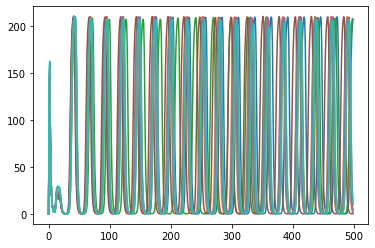

In [71]:
# Représentation graphique
for i in range(nCell):
    plt.plot(time,b[i])

plt.show()

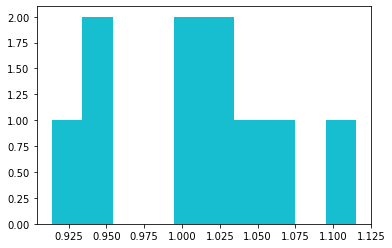

In [72]:
# Représentation graphique du paramètre beta de la simulation
for i in range(nCell):
    plt.hist(beta)
plt.show()

<ipython-input-73-97c8000a8aa6>:7: RuntimeWarning: divide by zero encountered in true_divide
  freqs = np.divide(60,freqs)


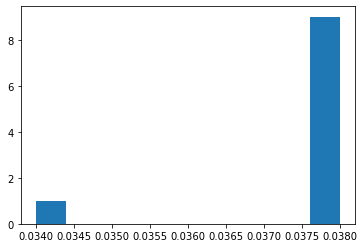

[0.038, 0.038, 0.034, 0.038, 0.038, 0.038, 0.038, 0.038, 0.038, 0.038]


In [73]:
# Représentation graphique de la fréquence
for i in range(nCell):
    T = 60/(t/len(b[i]))
    a = np.abs(fft.rfft(b[i], n=b[i].size))
    a[0]=0
    freqs = fft.rfftfreq(b[i].size, d=1./T)
    freqs = np.divide(60,freqs)
    max_freq = freqs[np.argmax(a)]
    p = round(1/max_freq, 3)

    frequence_list.append(p)

plt.hist(frequence_list)
plt.show()
print(frequence_list)